In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Simulador COVID-19

## Lucas Quiceno.
## Carlos Betancur.
## Física Computacional I. 

Frente a la pandemia que enfrentamos, el Washigton Post ha desarrollado una estrategia informativa muy novedosa en la que comparte simulaciones computacionales para mostrar como se propaga un virus en una población y como al disminuir la movilidad de los miembros de la población se desacelera el contagio de la población.

El artículo en cuestión es:
https://www.washingtonpost.com/graphics/2020/world/corona-simulator/

Este proyecto consistirá en reproudcir los resultados del artículo bien sea en Python o en C++. Se requiere utilizar la programación orientada a objetos para definir los miembros de dicha población, mas sin embargo los detalles e la implementación quedan a la libre elección de cada grupo.

Objetivo: Obtener gráficos similares a los obtenidos por las simulaciones del Washigton Post en cuanto a número de infectados, número de no infectados y de recuperados como función del tiempo.

A desarrollar en equipos de dos personas. Recuerden las reglas de entrega de los resultados de los proyectos.

Nota: No es necesario hacer la representación gráfica de la población y ver a sus miembros como bolitas moviéndose.



## Solución
La propuesta para solucionar el problema propuesto usando la programación orientada a objetos es realmente muy simple, se propone un radio de infección en el cual cualquier persona o partícula (punto aletario para nuestro caso)en este radio también termina enfermo, la población se encuentra adentro de una caja de tamaño arbitrario.

Las variables lados de la caja, radio de infección, se definen a continuación, además, se define una población de 200 inviduos que será la población total.

In [77]:
#parametros del sistema
rad_ifc=5 #radio de infeccion
population=200 #numero de individuos
x_box=200 #parametros de la caja 
y_box=200

A continuación se define la clase que será llamada en todo el código en la cual evoluaciona la población, es de notar que se define como un objeto de la clase el cambio de dirección de las velocidades cuando un una partícula golpea en la pared de la caja y adicionalemente se usan las ecuaciones cinématicas para la velocidad.$$y=y_{0}+v_{y}t$$ $$x=x_{0}+v_{x}t$$

In [78]:
class People: #clase madre

    def __init__(self,x,y,vx,vy,ifc,rec):
        self.X=x
        self.Y=y
        self.VX=vx
        self.VY=vy
        self.Infection=ifc
        self.Recovery=rec


    def pos_evol(self,t): 
        
        if self.Y > y_box: #condiciones en y para la caja 
            self.Y = y_box
            self.VY = -1*self.VY
        
        elif self.Y < 0:
            self.Y = 0
            self.VY = -1*self.VY
        
        elif self.X > x_box: #condiones en x para caja 
            self.X = x_box
            self.VX = -1*self.VX
        
        elif self.X < 0:
            self.X = 0
            self.VX = -1*self.VX

        self.X=self.X+self.VX*t #ecuaciones cinematicas 
        self.Y=self.Y+self.VY*t


Se crea el que se llama paciente cero ya que es el primero en tener la enfermedd y adicionalmente se usa np.random para generar números aleatorios adentro de la caja. Es de notar que la creación de humanos como instancias de la clase.

In [79]:
#paciente cero

x=x_box*np.random.random_sample() #llenar la caja con numeros aleatorios 
y=y_box*np.random.random_sample()
vx=(2*np.random.random_sample() - 1)*0.01
vy=(2*np.random.random_sample() - 1)*0.01
person=[People(x,y,vx,vy,True,False)] 

Para solucionar problemas con iterción se debe poner una semilla de personas en cuarentena. Esto para evitar que el código enferme a toda la población y la alivie a toda al mismo tiempo, con el fin de solucionar este problema se pone la variable at_home que seŕa clave en el resto del codigo debido que nos dará cuenta de la de la población que se encuentra en cuarentena.

In [80]:
#resto de la poblacion
at_home=5
#se entan moviendo todavia
for i in range(population-at_home):
    x=x_box*np.random.random_sample()
    y=y_box*np.random.random_sample()
    vx=(2*np.random.random_sample() - 1)*0.01
    vy=(2*np.random.random_sample() - 1)*0.01
    person.append(People(x,y,vx,vy,False,False)) #se llama la clase People con los atributos de la caja 

En la siguiente parte del código lo que se busca es dejar al número de individuos en cuarentena con velocidad cero, es decir, estas personas al no tener movimiento no pueden cotagiar ni ser contagiados con el virus. Ya después simplemente se crean las listas que se pondrán a iterar.

In [81]:
#distancia social (estar en casa)
for i in range(at_home):
    x=x_box*np.random.random_sample()
    y=y_box*np.random.random_sample()
    vx=0
    vy=0
    person.append(People(x,y,vx,vy,False,False))

In [82]:
#listas a llenar
ifc_list=[0] 
time_list=[0]
rec_list=[0]
time_list2=[0]

list_lists=[]
list_lists2=[]


In [83]:
#se llenan
for i in range (population):
  lists=[]
  list_lists.append(lists)
  lists2=[]
  list_lists2.append(lists2)

La parte mas importante del código es la siguiente. Es donde se logra hacer un recorrido por lo humanos preguntando si en efecto son portadores del virus, son recuperados o no son portadores.

Se define una varibable llamada distance que no es mas que la distancia la distancia entre dos puntos en un eje cartesiano. $$ d=\sqrt{(x_{i}-x_{j})^{2}+(y_{i}-y_{j})^{2}} $$

También se nota que se imponen condicones en los if usados para que una persona este sana, recuperada o enferma y finalmente se llenan las lista creadas anteriormente con los resultados obtenidos.

In [84]:
#evolucion del sistema 

for j in range(1300):
    
    for i in range (population):

        person[i].pos_evol(j)

        for k in range(population):

            distance = np.sqrt(((person[i].X-person[k].X)**2)+((person[i].Y-person[k].Y)**2))
            if distance < rad_ifc and person[i].Infection == True and person[k].Infection == False and person[k].Recovery == False :
                person[k].Infection=True
                ifc_list.append(ifc_list[-1]+1)
                time_list.append(j)


        if person[i].Infection == True and person[i].Recovery == False and len(list_lists2[i]) < 300 :
          list_lists2[i].append(1)
          if len(list_lists2[i])  == 300 and len(list_lists[i])<1  :
            person[i].Recovery = True
            ifc_list.append(ifc_list[-1]-1)
            time_list.append(j)
            rec_list.append(rec_list[-1]+1)
            time_list2.append(j)
            person[i].Infection = False
            list_lists[i].append(1)

Se organiza la dimensión de las listas para finalmente realizar las gráficas.

In [85]:
# se organizan las listas para la grafica
rec_array=200-np.array(rec_list)
rec_array=np.append(rec_array,0)
time_list2.append(1300)

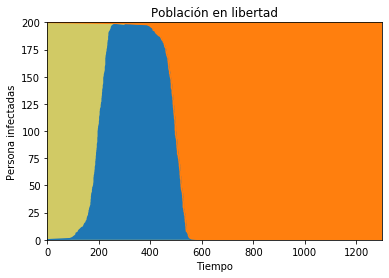

In [86]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1300),ylim=(0, 200) )
ax.set_facecolor('#D1CA65')
ax.set_title('Población en libertad')
ax.set_ylabel('Persona infectadas')
ax.set_xlabel('Tiempo')
plt.plot(time_list,ifc_list) 
plt.plot(time_list2,rec_array) 
plt.fill_between(time_list, ifc_list)
plt.fill_between(time_list2, rec_array, np.max(rec_array))

plt.show()

En azul se observa la población que se enferma, se puede observar un pico muy pronunciado de la enfermedad. En amarillo oscuro a la derecha la población despues de pasar el pico de la enfermedad y finalmente en amarillo claro la población sana que termina infectada rápidamente.

# Caso 2. Cuaretena en de una parte de población.

Se repite el mismo proceso de creación de personas e iteración anterior pero usando la clase definida anteriormente. La diferencia de este caso radica en que la variable at_home que, como se dijo, representala población en cuarentena ahora toma un valor de 60, es decir, 60 personas se quedan quietas o mejor, en casa.

In [127]:
#paciente cero

x=x_box*np.random.random_sample() #llenar la caja con numeros aleatorios 
y=y_box*np.random.random_sample()
vx=(2*np.random.random_sample() - 1)*0.01
vy=(2*np.random.random_sample() - 1)*0.01
person=[People(x,y,vx,vy,True,False)] 

In [128]:
#resto de la poblacion
at_home=60
#se entan moviendo todavia
for i in range(population-at_home):
    x=x_box*np.random.random_sample()
    y=y_box*np.random.random_sample()
    vx=(2*np.random.random_sample() - 1)*0.01
    vy=(2*np.random.random_sample() - 1)*0.01
    person.append(People(x,y,vx,vy,False,False)) #se llama la clase People con los atributos de la caja 

In [129]:
#distancia social (estar en casa)
for i in range(at_home):
    x=x_box*np.random.random_sample()
    y=y_box*np.random.random_sample()
    vx=0
    vy=0
    person.append(People(x,y,vx,vy,False,False))

In [130]:
#listas a llenar
ifc_list=[0] 
time_list=[0]
rec_list=[0]
time_list2=[0]

list_lists=[]
list_lists2=[]


In [131]:
#se llenan
for i in range (population):
  lists=[]
  list_lists.append(lists)
  lists2=[]
  list_lists2.append(lists2)

In [132]:
#evolucion del sistema 

for j in range(1300):
    
    for i in range (population):

        person[i].pos_evol(j)

        for k in range(population):

            distance = np.sqrt(((person[i].X-person[k].X)**2)+((person[i].Y-person[k].Y)**2))
            if distance < rad_ifc and person[i].Infection == True and person[k].Infection == False and person[k].Recovery == False :
                person[k].Infection=True
                ifc_list.append(ifc_list[-1]+1)
                time_list.append(j)


        if person[i].Infection == True and person[i].Recovery == False and len(list_lists2[i]) < 300 :
          list_lists2[i].append(1)
          if len(list_lists2[i])  == 300 and len(list_lists[i])<1  :
            person[i].Recovery = True
            ifc_list.append(ifc_list[-1]-1)
            time_list.append(j)
            rec_list.append(rec_list[-1]+1)
            time_list2.append(j)
            person[i].Infection = False
            list_lists[i].append(1)

In [133]:
# se organizan las listas para la grafica
rec_array=200-np.array(rec_list)
rec_array=np.append(rec_array,0)
time_list2.append(1300)

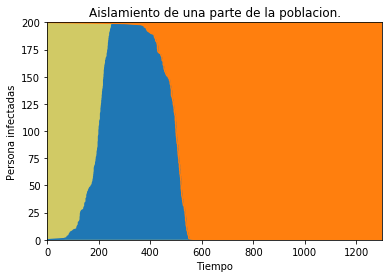

In [134]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1300),ylim=(0, 200) )
ax.set_facecolor('#D1CA65')
ax.set_title('Aislamiento de una parte de la poblacion.')
ax.set_ylabel('Persona infectadas')
ax.set_xlabel('Tiempo')
plt.plot(time_list,ifc_list) 
plt.plot(time_list2,rec_array) 
plt.fill_between(time_list, ifc_list)
plt.fill_between(time_list2, rec_array, np.max(rec_array))

plt.show()

En azul se observa la población que se enferma, se puede observar un pico muy pronunciado de la enfermedad, pero un poco menos que el anterior. En amarillo oscuro a la derecha la población despues de pasar el pico de la enfermedad y finalmente en amarillo claro la población sana que termina infectada rápidamente, pero no tan rápido como antes.

## Caso 3. 3/4 de la población en cuarentena.

Se repite el mismo proceso de creación de personas e iteración anterior pero usando la clase definida anteriormente. La diferencia aquí es que la variable at_home ahora toma un valor de 175, es decir, 175 personas se quedan quietas o mejor, en casa. Si se toma la varibale en 150 no se observa mucho cambio y la idea es observa cierto cambio, por esto se toma la variable de esta forma.

In [111]:
#paciente cero

x=x_box*np.random.random_sample() #llenar la caja con numeros aleatorios 
y=y_box*np.random.random_sample()
vx=(2*np.random.random_sample() - 1)*0.01
vy=(2*np.random.random_sample() - 1)*0.01
person=[People(x,y,vx,vy,True,False)] 

In [112]:
#resto de la poblacion
at_home=175
#se entan moviendo todavia
for i in range(population-at_home):
    x=x_box*np.random.random_sample()
    y=y_box*np.random.random_sample()
    vx=(2*np.random.random_sample() - 1)*0.01
    vy=(2*np.random.random_sample() - 1)*0.01
    person.append(People(x,y,vx,vy,False,False)) #se llama la clase People con los atributos de la caja 

In [113]:
#distancia social (estar en casa)
for i in range(at_home):
    x=x_box*np.random.random_sample()
    y=y_box*np.random.random_sample()
    vx=0
    vy=0
    person.append(People(x,y,vx,vy,False,False))

In [114]:
#listas a llenar
ifc_list=[0] 
time_list=[0]
rec_list=[0]
time_list2=[0]

list_lists=[]
list_lists2=[]


In [115]:
#se llenan
for i in range (population):
  lists=[]
  list_lists.append(lists)
  lists2=[]
  list_lists2.append(lists2)

In [116]:
#evolucion del sistema 

for j in range(1300):
    
    for i in range (population):

        person[i].pos_evol(j)

        for k in range(population):

            distance = np.sqrt(((person[i].X-person[k].X)**2)+((person[i].Y-person[k].Y)**2))
            if distance < rad_ifc and person[i].Infection == True and person[k].Infection == False and person[k].Recovery == False :
                person[k].Infection=True
                ifc_list.append(ifc_list[-1]+1)
                time_list.append(j)


        if person[i].Infection == True and person[i].Recovery == False and len(list_lists2[i]) < 300 :
          list_lists2[i].append(1)
          if len(list_lists2[i])  == 300 and len(list_lists[i])<1  :
            person[i].Recovery = True
            ifc_list.append(ifc_list[-1]-1)
            time_list.append(j)
            rec_list.append(rec_list[-1]+1)
            time_list2.append(j)
            person[i].Infection = False
            list_lists[i].append(1)

In [117]:
# se organizan las listas para la grafica
rec_array=200-np.array(rec_list)
rec_array=np.append(rec_array,0)
time_list2.append(1300)

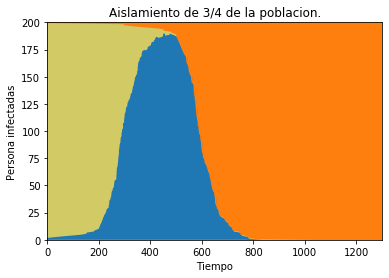

In [118]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1300),ylim=(0, 200) )
ax.set_facecolor('#D1CA65')
ax.set_title('Aislamiento de 3/4 de la poblacion.')
ax.set_ylabel('Persona infectadas')
ax.set_xlabel('Tiempo')
plt.plot(time_list,ifc_list) 
plt.plot(time_list2,rec_array) 
plt.fill_between(time_list, ifc_list)
plt.fill_between(time_list2, rec_array, np.max(rec_array))

plt.show()

En azul la población que se enferma con un pico menos pronunciado de la enfermedad. En amarillo oscuro a la derecha la población despues de pasar el pico de la enfermedad y finalmente en amarillo claro la población sana que termina infectada.

## Caso 4. 7/8 de la población en cuarentena.

Igual que antes con la creación de personas e iteración. Aquí la variable at_home ahora toma un valor de 190, es decir, 190 personas se quedan quietas o mejor. Si se toma la varibale en 175 no se observa el cambio deseado, por esto se toma la variable de esta forma.

In [119]:
#paciente cero

x=x_box*np.random.random_sample() #llenar la caja con numeros aleatorios 
y=y_box*np.random.random_sample()
vx=(2*np.random.random_sample() - 1)*0.01
vy=(2*np.random.random_sample() - 1)*0.01
person=[People(x,y,vx,vy,True,False)] 

In [120]:
#resto de la poblacion
at_home=190
#se entan moviendo todavia
for i in range(population-at_home):
    x=x_box*np.random.random_sample()
    y=y_box*np.random.random_sample()
    vx=(2*np.random.random_sample() - 1)*0.01
    vy=(2*np.random.random_sample() - 1)*0.01
    person.append(People(x,y,vx,vy,False,False)) #se llama la clase People con los atributos de la caja 

In [121]:
#distancia social (estar en casa)
for i in range(at_home):
    x=x_box*np.random.random_sample()
    y=y_box*np.random.random_sample()
    vx=0
    vy=0
    person.append(People(x,y,vx,vy,False,False))

In [122]:
#listas a llenar
ifc_list=[0] 
time_list=[0]
rec_list=[0]
time_list2=[0]

list_lists=[]
list_lists2=[]


In [123]:
#se llenan
for i in range (population):
  lists=[]
  list_lists.append(lists)
  lists2=[]
  list_lists2.append(lists2)

In [124]:
#evolucion del sistema 

for j in range(1300):
    
    for i in range (population):

        person[i].pos_evol(j)

        for k in range(population):

            distance = np.sqrt(((person[i].X-person[k].X)**2)+((person[i].Y-person[k].Y)**2))
            if distance < rad_ifc and person[i].Infection == True and person[k].Infection == False and person[k].Recovery == False :
                person[k].Infection=True
                ifc_list.append(ifc_list[-1]+1)
                time_list.append(j)


        if person[i].Infection == True and person[i].Recovery == False and len(list_lists2[i]) < 300 :
          list_lists2[i].append(1)
          if len(list_lists2[i])  == 300 and len(list_lists[i])<1  :
            person[i].Recovery = True
            ifc_list.append(ifc_list[-1]-1)
            time_list.append(j)
            rec_list.append(rec_list[-1]+1)
            time_list2.append(j)
            person[i].Infection = False
            list_lists[i].append(1)

In [125]:
# se organizan las listas para la grafica
rec_array=200-np.array(rec_list)
rec_array=np.append(rec_array,0)
time_list2.append(1300)

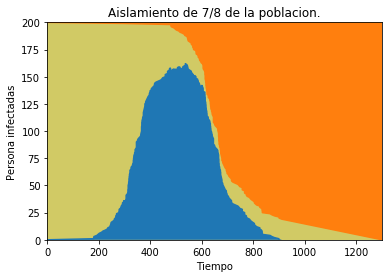

In [126]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1300),ylim=(0, 200) )
ax.set_facecolor('#D1CA65')
ax.set_title('Aislamiento de 7/8 de la poblacion.')
ax.set_ylabel('Persona infectadas')
ax.set_xlabel('Tiempo')
plt.plot(time_list,ifc_list) 
plt.plot(time_list2,rec_array) 
plt.fill_between(time_list, ifc_list)
plt.fill_between(time_list2, rec_array, np.max(rec_array))

plt.show()

En azul la población enferma con un pico mucho menos pronunciado de la enfermedad. En amarillo oscuro a la derecha la población despues de pasar el pico de la enfermedad y finalmente en amarillo claro la población sana que termina infectada.\
Aquí es evidente que la cuarentena desacelera la propagación de la enfermedad y por lo tanto se tienen menos contagios y mas lentos lo que permite que no se colapse el sistema de salud y se cuiden más vidas.

## Conclusiones.

El código funciona bien y da resultados similiares a los esperados que son los obtenidos por el Washigton Post.\
El código es demasiado lento al compilar lo que lo hace poco práctico.\
Se puede mejorar la velocidad de ejecución o la forma en que interactúan las personas en la caja, lo que permitiría obtener mejores curvas, ya que en las dos primeras gráficas no se ve gran diferencia, la diferencia se nota después de la tercera y se obtiene un excelente resultado ya en la cuarta gráfica.